In [1]:
import numpy as np
import scipy.linalg as la

def simple_bipartite_matching(adjacency_matrix):
    n = adjacency_matrix.shape[1]  # Number of columns (vertices in one partition)
    B = np.linalg.inv(adjacency_matrix)
    M = []  # Initialize the matching as an empty list

    for c in range(n):
        # Find an unmatched row (r) such that B[r, c] == 0
        r_candidates = [r for r in range(n) if B[r, c] == 0]

        if len(r_candidates) > 0:
            r = r_candidates[0]  # Select the first unmatched row
            M.append((c, r))  # Add the edge (u_c, v_r) to the matching

            # Eliminate the r-th row and the c-th column of B
            B = np.delete(B, r, axis=0)
            B = np.delete(B, c, axis=1)

    return M




In [2]:
# Complete bipartite is singular. Non-invertible.
"""
from networkx.algorithms import bipartite
n1 = 10
n2 = 10

G = bipartite.complete_bipartite_graph(n1, n2)
"""

'\nfrom networkx.algorithms import bipartite\nn1 = 10\nn2 = 10\n\nG = bipartite.complete_bipartite_graph(n1, n2)\n'

In [3]:
# Complete bipartite is singular. Non-invertible.

from networkx.algorithms import bipartite
n1 = 10
n2 = 12

G = bipartite.complete_bipartite_graph(n1, n2)


In [4]:
from networkx.algorithms import bipartite
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)

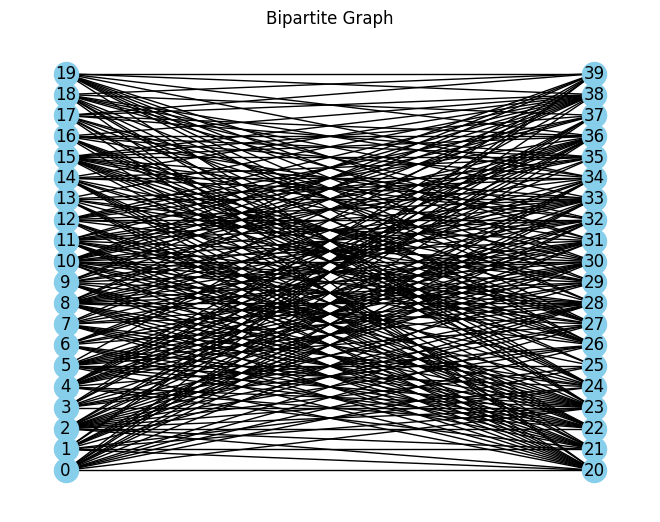

In [5]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=300)
plt.title("Bipartite Graph")
plt.show()

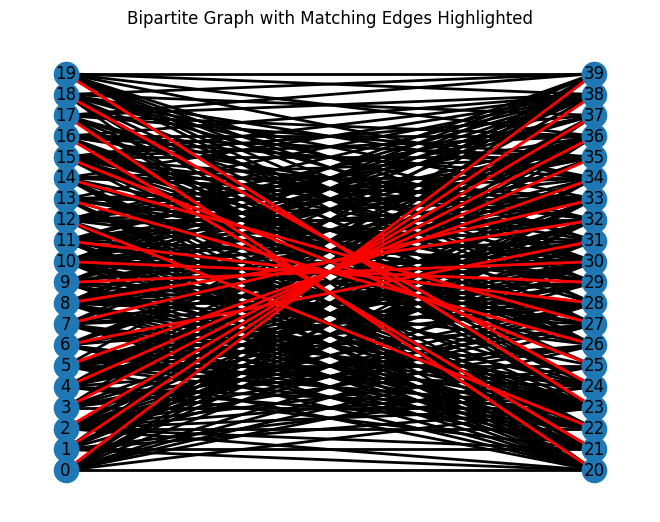

In [6]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)

# Find the maximum cardinality matching
matching = nx.max_weight_matching(G, maxcardinality=True)

# Create a new graph with only the matching edges
matching_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
matching_graph = nx.Graph()
matching_graph.add_edges_from(matching_edges)

# Create a list of edge colors, red for edges in the matching and black for others
edge_colors = ['r' if (u, v) in matching_edges or (v, u) in matching_edges else 'k' for u, v in G.edges()]

# Draw the bipartite graph with matching edges highlighted in red
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
nx.draw(matching_graph, pos, with_labels=False, edge_color='r', width=2.0)

plt.title("Bipartite Graph with Matching Edges Highlighted")
plt.show()


In [7]:
"""
import networkx as nx
import matplotlib.pyplot as plt

# Create the Karate Club graph
G = nx.karate_club_graph()

# Find the maximum cardinality matching
matching = nx.maximal_matching(G)

# Create a list of edge colors, red for edges in the matching and black for others
edge_colors = ['r' if edge in matching or (edge[1], edge[0]) in matching else 'k' for edge in G.edges()]

# Draw the graph with edges in the matching as bold red
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
plt.title("Karate Club Graph with Maximum Cardinality Matching")
plt.show()
"""

'\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\n# Create the Karate Club graph\nG = nx.karate_club_graph()\n\n# Find the maximum cardinality matching\nmatching = nx.maximal_matching(G)\n\n# Create a list of edge colors, red for edges in the matching and black for others\nedge_colors = [\'r\' if edge in matching or (edge[1], edge[0]) in matching else \'k\' for edge in G.edges()]\n\n# Draw the graph with edges in the matching as bold red\npos = nx.spring_layout(G)\nnx.draw(G, pos, with_labels=True, node_color=\'skyblue\', edge_color=edge_colors, width=2.0)\nplt.title("Karate Club Graph with Maximum Cardinality Matching")\nplt.show()\n'

In [8]:
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="csc")

# Print the SciPy sparse matrix (in Compressed Sparse Column format, CSC)
print(mat)

  (20, 0)	1
  (23, 0)	1
  (25, 0)	1
  (26, 0)	1
  (27, 0)	1
  (28, 0)	1
  (30, 0)	1
  (32, 0)	1
  (33, 0)	1
  (34, 0)	1
  (36, 0)	1
  (37, 0)	1
  (39, 0)	1
  (20, 1)	1
  (21, 1)	1
  (23, 1)	1
  (24, 1)	1
  (28, 1)	1
  (31, 1)	1
  (32, 1)	1
  (33, 1)	1
  (34, 1)	1
  (38, 1)	1
  (39, 1)	1
  (20, 2)	1
  :	:
  (18, 37)	1
  (1, 38)	1
  (4, 38)	1
  (7, 38)	1
  (8, 38)	1
  (9, 38)	1
  (10, 38)	1
  (11, 38)	1
  (12, 38)	1
  (13, 38)	1
  (14, 38)	1
  (15, 38)	1
  (16, 38)	1
  (17, 38)	1
  (19, 38)	1
  (0, 39)	1
  (1, 39)	1
  (3, 39)	1
  (5, 39)	1
  (8, 39)	1
  (9, 39)	1
  (10, 39)	1
  (17, 39)	1
  (18, 39)	1
  (19, 39)	1


In [9]:
# Lovasz generalized Tutte’s theorem shows that the rank of the Tutte
# matrix gives the size of the maximum matching in the graph.
from scipy.sparse.csgraph import structural_rank

# Set the random seed to 13
np.random.seed(13)

# Get the number of non-zero elements (nnz) in the matrix
nnz = mat.nnz

# Multiply the data array in place by random integers between 0 and nnz
random_integers = np.random.randint(1, nnz + 1, size=nnz)
mat.data = random_integers

# Rank of Tutte
r = structural_rank(mat)
print("Rank",r)
print("Upper bound |M|",r//2)
print("Ground truth |M|",len(matching))
# Print the modified SciPy sparse matrix (in CSC format)
print(mat)

Rank 40
Upper bound |M| 20
Ground truth |M| 20
  (20, 0)	339
  (23, 0)	177
  (25, 0)	75
  (26, 0)	17
  (27, 0)	231
  (28, 0)	355
  (30, 0)	245
  (32, 0)	154
  (33, 0)	237
  (34, 0)	443
  (36, 0)	484
  (37, 0)	411
  (39, 0)	245
  (20, 1)	127
  (21, 1)	451
  (23, 1)	431
  (24, 1)	439
  (28, 1)	230
  (31, 1)	462
  (32, 1)	75
  (33, 1)	330
  (34, 1)	332
  (38, 1)	309
  (39, 1)	259
  (20, 2)	161
  :	:
  (18, 37)	167
  (1, 38)	101
  (4, 38)	89
  (7, 38)	428
  (8, 38)	142
  (9, 38)	212
  (10, 38)	76
  (11, 38)	37
  (12, 38)	26
  (13, 38)	23
  (14, 38)	376
  (15, 38)	442
  (16, 38)	155
  (17, 38)	319
  (19, 38)	410
  (0, 39)	212
  (1, 39)	132
  (3, 39)	313
  (5, 39)	75
  (8, 39)	110
  (9, 39)	18
  (10, 39)	54
  (17, 39)	480
  (18, 39)	170
  (19, 39)	430


In [10]:
import scipy
invMat = scipy.sparse.linalg.inv(mat)

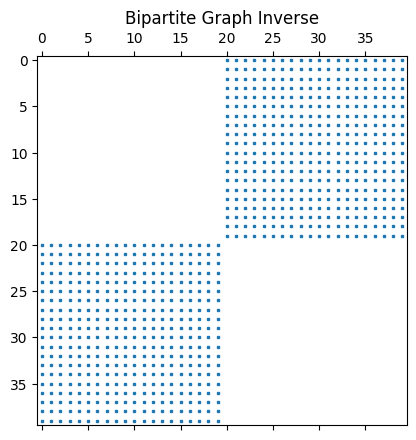

In [11]:
#Compute its LU
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(invMat, markersize=2)

plt.title("Bipartite Graph Inverse")
plt.show()


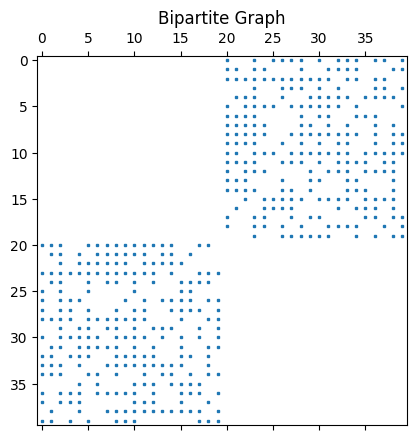

In [12]:
#Compute its LU
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(mat, markersize=2)

plt.title("Bipartite Graph")
plt.show()


In [13]:
lu = scipy.sparse.linalg.splu(mat)

In [14]:
diagL = lu.L.diagonal()
diagU = lu.U.diagonal()
L,U = lu.L, lu.U
d = diagL.prod()*diagU.prod()

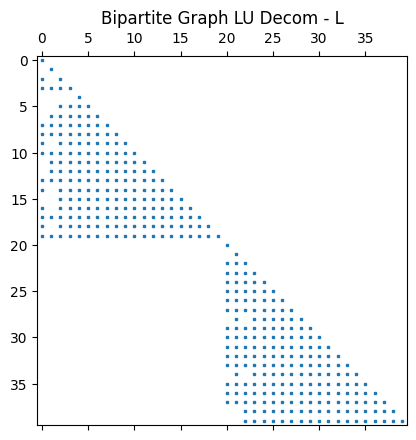

In [15]:
#Compute its LU
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(L, markersize=2)

plt.title("Bipartite Graph LU Decom - L")
plt.show()


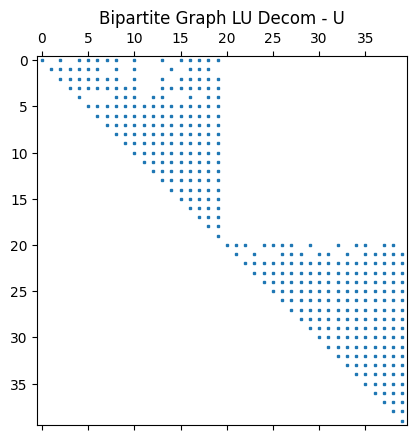

In [16]:
#Compute its LU
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(U, markersize=2)

plt.title("Bipartite Graph LU Decom - U")
plt.show()


In [17]:
from scipy.sparse.linalg import splu
lu = splu(mat)

In [18]:
diagL = lu.L.diagonal()
diagU = lu.U.diagonal()
L,R = lu.L, lu.U
d = diagL.prod()*diagU.prod()

In [19]:
dokMat = mat.todok()

In [20]:
dokInvMat = invMat.todok()

In [21]:
#print(dokMat)
#print(dokInvMat)

In [22]:
gausmatching = []
for c in range(dokInvMat.shape[0]):
    for row_idx in range(dokInvMat.shape[0]):
        if (dokInvMat.get((row_idx,c)) != 0.0 and dokMat.get((row_idx,c)) != 0.0):
            print("FOUND",row_idx,c)
            # Removing rth row
            dokInvMat[row_idx, :]=0.0
            # Removing cth column
            dokInvMat[:, c]=0.0
            
            gausmatching.append((row_idx,c))
print(matching)
print(gausmatching)

FOUND 20 0
FOUND 21 1
FOUND 22 2
FOUND 23 3
FOUND 26 4
FOUND 24 5
FOUND 28 6
FOUND 29 7
FOUND 27 8
FOUND 30 9
FOUND 25 10
FOUND 32 11
FOUND 31 12
FOUND 33 13
FOUND 34 14
FOUND 35 15
FOUND 36 16
FOUND 38 17
FOUND 37 18
FOUND 39 19
FOUND 0 20
FOUND 1 21
FOUND 2 22
FOUND 3 23
FOUND 5 24
FOUND 10 25
FOUND 4 26
FOUND 8 27
FOUND 6 28
FOUND 7 29
FOUND 9 30
FOUND 12 31
FOUND 11 32
FOUND 13 33
FOUND 14 34
FOUND 15 35
FOUND 16 36
FOUND 18 37
FOUND 17 38
FOUND 19 39
{(23, 19), (12, 22), (30, 9), (38, 1), (29, 10), (37, 2), (36, 3), (28, 11), (33, 7), (35, 4), (17, 20), (32, 8), (26, 13), (25, 15), (31, 6), (16, 21), (34, 5), (27, 14), (24, 18), (39, 0)}
[(20, 0), (21, 1), (22, 2), (23, 3), (26, 4), (24, 5), (28, 6), (29, 7), (27, 8), (30, 9), (25, 10), (32, 11), (31, 12), (33, 13), (34, 14), (35, 15), (36, 16), (38, 17), (37, 18), (39, 19), (0, 20), (1, 21), (2, 22), (3, 23), (5, 24), (10, 25), (4, 26), (8, 27), (6, 28), (7, 29), (9, 30), (12, 31), (11, 32), (13, 33), (14, 34), (15, 35), (16, 36)

In [26]:
print(len(matching))
print(len(gausmatching))
print(sorted(gausmatching))

20
40
[(0, 20), (1, 21), (2, 22), (3, 23), (4, 26), (5, 24), (6, 28), (7, 29), (8, 27), (9, 30), (10, 25), (11, 32), (12, 31), (13, 33), (14, 34), (15, 35), (16, 36), (17, 38), (18, 37), (19, 39), (20, 0), (21, 1), (22, 2), (23, 3), (24, 5), (25, 10), (26, 4), (27, 8), (28, 6), (29, 7), (30, 9), (31, 12), (32, 11), (33, 13), (34, 14), (35, 15), (36, 16), (37, 18), (38, 17), (39, 19)]
